In [1]:
#Import library
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

# Importing data

In [2]:
data=pd.read_excel("C:\\Users\\ASUS\\Downloads\\Lương Thị Mỹ Tâm -K204141929.xlsx")
data

ID  Ability to repay (0: on-time, 1: overdue)     Gender  \
0        1                                          0  1. female   
1        2                                          0    0. male   
2        3                                          1  1. female   
3        4                                          0    0. male   
4        5                                          0  1. female   
...    ...                                        ...        ...   
1844  1845                                          1    0. male   
1845  1846                                          1    0. male   
1846  1847                                          0  1. female   
1847  1848                                          1    0. male   
1848  1849                                          1  1. female   

           Loan Purpose Marital Status  Electricity Bill  Loan Amount  \
0        1. Consumption     3. Married            319883     48000000   
1           4. Learning      1. Single            150000     60000000   
2        1. Consumption      1. Single            120000     32000000   
3        1. Consumption    2. Divorced            221520     27000000   
4        1. Consumption     3. Married            320994    100000000   
...                 ...            ...               ...          ...   
1844      5. Investment      1. Single            300000    120000000   
1845  2. Buying a house    2. Divorced            750000    800000000   
1846    3. Buying a car    2. Divorced            400000   1200000000   
1847        4. Learning      1. Single            350000    700000000   
1848     1. Consumption      1. Single            230000    100000000   

      Job Tenure (year)  Age  Loan Term (month)    Income Collaterals  \
0                    11   43                 48  40000000         yes   
1                     5   24                 36  10000000         yes   
2                     7   23                 12  22000000          no   
3                     9   57                 36  22000000          no   
4                     6   57                  6  22000000          no   
...                 ...  ...                ...       ...         ...   
1844                  3   25                 24  78000000          no   
1845                  5   27                 36  30000000         yes   
1846                  6   35                 36  22000000         yes   
1847                  3   25                 48  32000000         yes   
1848                  5   27                 23  20000000         yes   

     Proof of income  
0                yes  
1                yes  
2                yes  
3                 no  
4                 no  
...              ...  
1844             yes  
1845             yes  
1846              no  
1847             yes  
1848             yes  

[1849 rows x 13 columns]

# Checking data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849 entries, 0 to 1848
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   ID                                         1849 non-null   int64 
 1   Ability to repay (0: on-time, 1: overdue)  1849 non-null   int64 
 2   Gender                                     1849 non-null   object
 3   Loan Purpose                               1849 non-null   object
 4   Marital Status                             1849 non-null   object
 5   Electricity Bill                           1849 non-null   int64 
 6   Loan Amount                                1849 non-null   int64 
 7   Job Tenure (year)                          1849 non-null   int64 
 8   Age                                        1849 non-null   int64 
 9   Loan Term (month)                          1849 non-null   int64 
 10  Income                              

# Data processing

In [4]:
data1=pd.DataFrame(data)

In [5]:
#remove ID column
data1 = data1.iloc[:,1:]
data1

Ability to repay (0: on-time, 1: overdue)     Gender       Loan Purpose  \
0                                             0  1. female     1. Consumption   
1                                             0    0. male        4. Learning   
2                                             1  1. female     1. Consumption   
3                                             0    0. male     1. Consumption   
4                                             0  1. female     1. Consumption   
...                                         ...        ...                ...   
1844                                          1    0. male      5. Investment   
1845                                          1    0. male  2. Buying a house   
1846                                          0  1. female    3. Buying a car   
1847                                          1    0. male        4. Learning   
1848                                          1  1. female     1. Consumption   

     Marital Status  Electricity Bill  Loan Amount  Job Tenure (year)  Age  \
0        3. Married            319883     48000000                 11   43   
1         1. Single            150000     60000000                  5   24   
2         1. Single            120000     32000000                  7   23   
3       2. Divorced            221520     27000000                  9   57   
4        3. Married            320994    100000000                  6   57   
...             ...               ...          ...                ...  ...   
1844      1. Single            300000    120000000                  3   25   
1845    2. Divorced            750000    800000000                  5   27   
1846    2. Divorced            400000   1200000000                  6   35   
1847      1. Single            350000    700000000                  3   25   
1848      1. Single            230000    100000000                  5   27   

      Loan Term (month)    Income Collaterals Proof of income  
0                    48  40000000         yes             yes  
1                    36  10000000         yes             yes  
2                    12  22000000          no             yes  
3                    36  22000000          no              no  
4                     6  22000000          no              no  
...                 ...       ...         ...             ...  
1844                 24  78000000          no             yes  
1845                 36  30000000         yes             yes  
1846                 36  22000000         yes              no  
1847                 48  32000000         yes             yes  
1848                 23  20000000         yes             yes  

[1849 rows x 12 columns]

In [6]:
#remove of unnecessary information 
for i in data1.columns[1:4]:
    data1[i] = data1[i].apply(lambda x: x.split(':')[0]) 
    data1[i] = data1[i].apply(lambda x: x.split('.')[0])
    data1[i] = data1[i].apply(lambda x: int(x))
    

In [7]:
#transform yes, no into 1 and 0
data1["Collaterals"] = data1["Collaterals"].map({"no": 0, "yes": 1})
data1["Proof of income"] = data1["Proof of income"].map({"no": 0, "yes": 1})


In [8]:
data1

Ability to repay (0: on-time, 1: overdue)  Gender  Loan Purpose  \
0                                             0       1             1   
1                                             0       0             4   
2                                             1       1             1   
3                                             0       0             1   
4                                             0       1             1   
...                                         ...     ...           ...   
1844                                          1       0             5   
1845                                          1       0             2   
1846                                          0       1             3   
1847                                          1       0             4   
1848                                          1       1             1   

      Marital Status  Electricity Bill  Loan Amount  Job Tenure (year)  Age  \
0                  3            319883     48000000                 11   43   
1                  1            150000     60000000                  5   24   
2                  1            120000     32000000                  7   23   
3                  2            221520     27000000                  9   57   
4                  3            320994    100000000                  6   57   
...              ...               ...          ...                ...  ...   
1844               1            300000    120000000                  3   25   
1845               2            750000    800000000                  5   27   
1846               2            400000   1200000000                  6   35   
1847               1            350000    700000000                  3   25   
1848               1            230000    100000000                  5   27   

      Loan Term (month)    Income  Collaterals  Proof of income  
0                    48  40000000            1                1  
1                    36  10000000            1                1  
2                    12  22000000            0                1  
3                    36  22000000            0                0  
4                     6  22000000            0                0  
...                 ...       ...          ...              ...  
1844                 24  78000000            0                1  
1845                 36  30000000            1                1  
1846                 36  22000000            1                0  
1847                 48  32000000            1                1  
1848                 23  20000000            1                1  

[1849 rows x 12 columns]

In [9]:
#remove customer under 18 and above 60
data1 = data1[(data1["Age"] >= 18) & (data1["Age"] <= 60)]
data1

Ability to repay (0: on-time, 1: overdue)  Gender  Loan Purpose  \
0                                             0       1             1   
1                                             0       0             4   
2                                             1       1             1   
3                                             0       0             1   
4                                             0       1             1   
...                                         ...     ...           ...   
1844                                          1       0             5   
1845                                          1       0             2   
1846                                          0       1             3   
1847                                          1       0             4   
1848                                          1       1             1   

      Marital Status  Electricity Bill  Loan Amount  Job Tenure (year)  Age  \
0                  3            319883     48000000                 11   43   
1                  1            150000     60000000                  5   24   
2                  1            120000     32000000                  7   23   
3                  2            221520     27000000                  9   57   
4                  3            320994    100000000                  6   57   
...              ...               ...          ...                ...  ...   
1844               1            300000    120000000                  3   25   
1845               2            750000    800000000                  5   27   
1846               2            400000   1200000000                  6   35   
1847               1            350000    700000000                  3   25   
1848               1            230000    100000000                  5   27   

      Loan Term (month)    Income  Collaterals  Proof of income  
0                    48  40000000            1                1  
1                    36  10000000            1                1  
2                    12  22000000            0                1  
3                    36  22000000            0                0  
4                     6  22000000            0                0  
...                 ...       ...          ...              ...  
1844                 24  78000000            0                1  
1845                 36  30000000            1                1  
1846                 36  22000000            1                0  
1847                 48  32000000            1                1  
1848                 23  20000000            1                1  

[1841 rows x 12 columns]

# Descriptive Statistics

In [10]:
import pandas_profiling as pp

In [11]:
pp.ProfileReport(data1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
data2=pd.DataFrame(data1)

In [12]:
#transform categorical columns into category Dtype
data2['Gender'] = data1['Gender'].astype('category')
data2['Loan Purpose'] = data1['Loan Purpose'].astype('category')
data2['Marital Status'] = data1['Marital Status'].astype('category')
data2['Ability to repay (0: on-time, 1: overdue)'] = data1['Ability to repay (0: on-time, 1: overdue)'].astype('category')
data2['Collaterals'] = data1['Collaterals'].astype('category')
data2['Proof of income'] = data1['Proof of income'].astype('category')


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841 entries, 0 to 1848
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Ability to repay (0: on-time, 1: overdue)  1841 non-null   category
 1   Gender                                     1841 non-null   category
 2   Loan Purpose                               1841 non-null   category
 3   Marital Status                             1841 non-null   category
 4   Electricity Bill                           1841 non-null   int64   
 5   Loan Amount                                1841 non-null   int64   
 6   Job Tenure (year)                          1841 non-null   int64   
 7   Age                                        1841 non-null   int64   
 8   Loan Term (month)                          1841 non-null   int64   
 9   Income                                     1841 non-null   int64   
 10  Collaterals 

In [14]:
#iloc[row, column]
num = data2.iloc[:,4:10]
cat = data2.drop(data2.columns[[4,5,6,7,8,9]], axis=1)

In [15]:
num.describe()

Electricity Bill   Loan Amount  Job Tenure (year)          Age  \
count      1.841000e+03  1.841000e+03        1841.000000  1841.000000   
mean       5.165630e+05  2.719278e+08           6.754481    37.513308   
std        3.178857e+05  3.977760e+08           2.739310    11.672755   
min        1.000000e+05  2.000000e+07           1.000000    18.000000   
25%        3.628870e+05  5.000000e+07           5.000000    27.000000   
50%        4.804030e+05  9.000000e+07           7.000000    35.000000   
75%        5.960000e+05  3.000000e+08           8.000000    47.000000   
max        3.200000e+06  2.000000e+09          15.000000    60.000000   

       Loan Term (month)        Income  
count        1841.000000  1.841000e+03  
mean           29.697990  3.274818e+07  
std            17.592552  2.105517e+07  
min             6.000000  1.500000e+06  
25%            12.000000  2.000000e+07  
50%            24.000000  3.000000e+07  
75%            48.000000  4.000000e+07  
max            72.000000  2.200000e+08

In [17]:
cat.describe()

Ability to repay (0: on-time, 1: overdue)  Gender  Loan Purpose  \
count                                        1841    1841          1841   
unique                                          2       2             5   
top                                             0       0             1   
freq                                         1002     937           708   

        Marital Status  Collaterals  Proof of income  
count             1841         1841             1841  
unique               3            2                2  
top                  2            0                1  
freq               742          924             1091

In [35]:
d = cat.groupby(['Ability to repay (0: on-time, 1: overdue)'])
d.describe().T

Ability to repay (0: on-time, 1: overdue)     0    1
Gender          count                      1002  839
                unique                        2    2
                top                           0    0
                freq                        504  433
Loan Purpose    count                      1002  839
                unique                        5    5
                top                           5    1
                freq                        304  426
Marital Status  count                      1002  839
                unique                        3    3
                top                           3    2
                freq                        501  380
Collaterals     count                      1002  839
                unique                        2    2
                top                           1    0
                freq                        712  634
Proof of income count                      1002  839
                unique                        2    2
                top                           1    0
                freq                        832  580

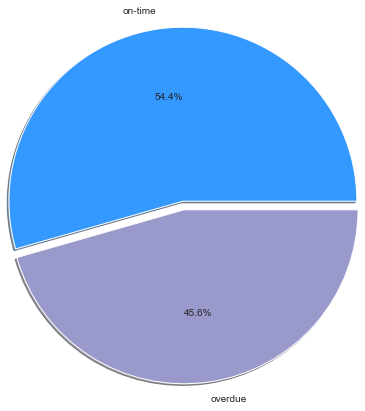

In [19]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of Gender
out_df=pd.DataFrame(data1.groupby('Ability to repay (0: on-time, 1: overdue)')['Ability to repay (0: on-time, 1: overdue)'].count())
colors = ['#3399FF','#9999CC']
plt.pie(out_df['Ability to repay (0: on-time, 1: overdue)'],labels=['on-time','overdue'],autopct="%.1f%%",colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

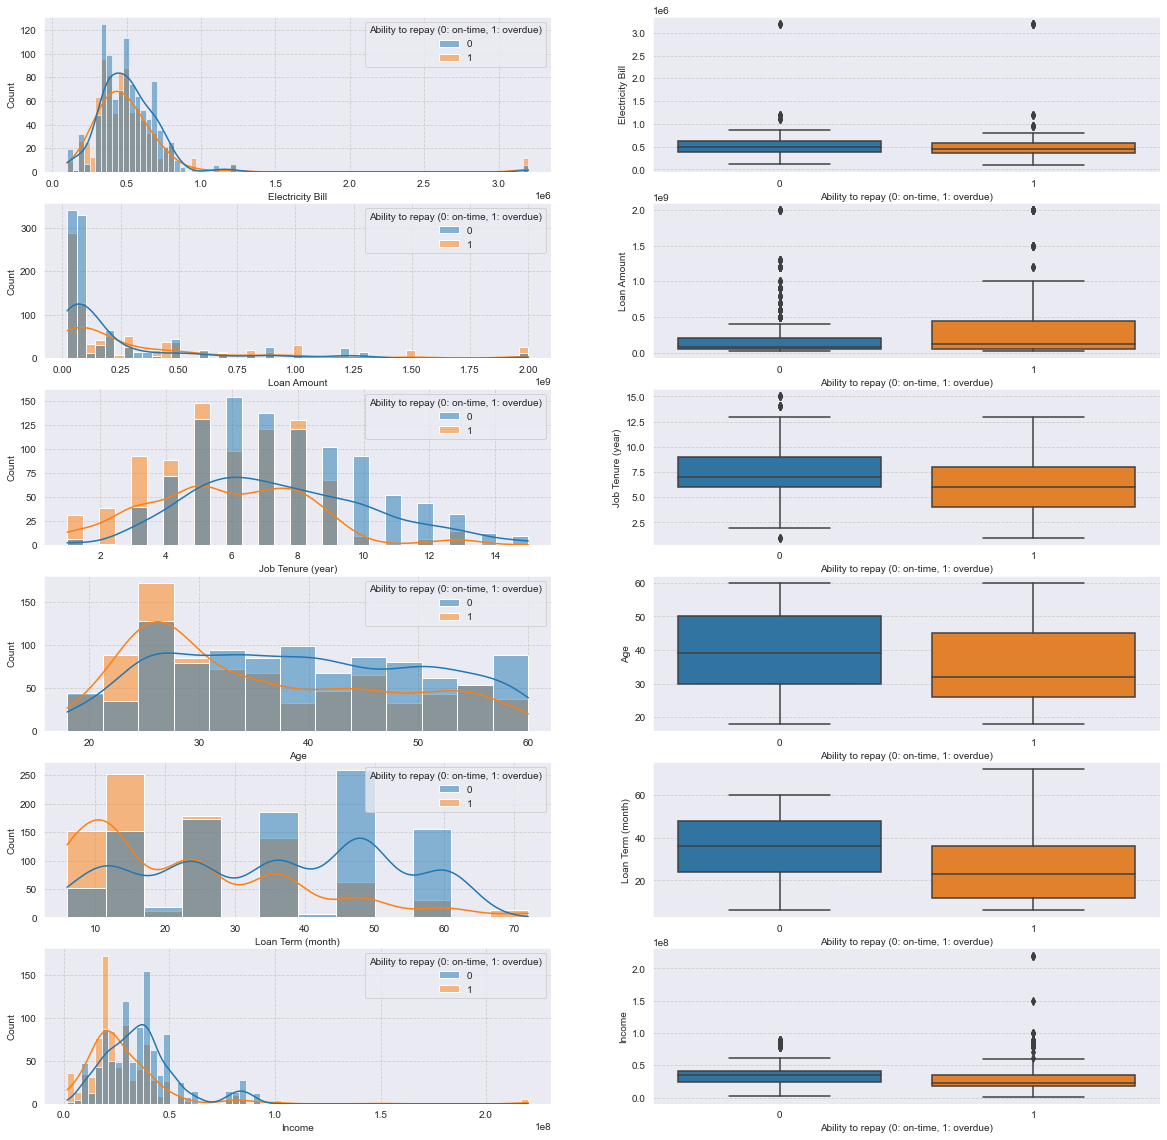

In [20]:
categor_col = ['Gender','Loan Purpose','Marital Status','Collaterals','Proof of income']
numerical_col = ['Electricity Bill','Loan Amount','Job Tenure (year)','Age','Loan Term (month)','Income']
fig, ax = plt.subplots(6, 2, **{"figsize": (20, 20)})

type_graph = ['histplot', 'boxplot']

for i, graph in enumerate(type_graph):
    for j, numerical in enumerate(numerical_col):
        if graph == 'histplot':
            sns.histplot(data=data1, x=numerical, hue='Ability to repay (0: on-time, 1: overdue)', ax=ax[j][i], kde=True)
        else:
            sns.boxplot(data=data1, x='Ability to repay (0: on-time, 1: overdue)', y=numerical, ax=ax[j][i])

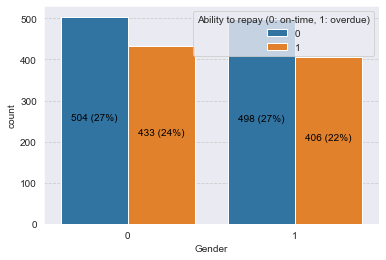

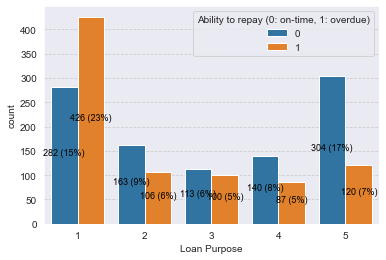

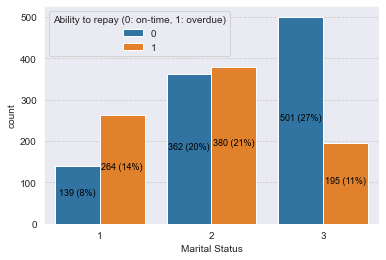

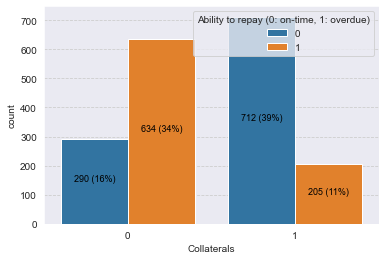

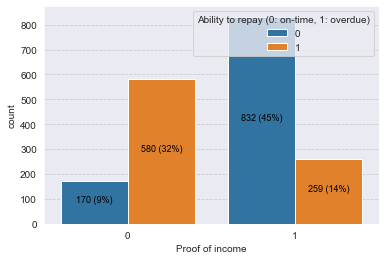

In [21]:
def cool_countplot(data=None, x=None, y=None, hue=None, text_size=9):
    ax = sns.countplot(data=data1, x=x, hue=hue)
    for p in ax.patches:
        ax.annotate(text=str(int(p.get_height())) + ' (' + '{:.0%}'.format(p.get_height()/data1.shape[0]) + ')',
                       xy=(p.get_x()+p.get_width()/2, p.get_height()/2), ha='center', color='black', size=text_size)
    return ax
cool_countplot(data=data1, x='Gender', hue='Ability to repay (0: on-time, 1: overdue)', text_size=10)
plt.show()
cool_countplot(data=data1, x='Loan Purpose', hue='Ability to repay (0: on-time, 1: overdue)')
plt.show()
cool_countplot(data=data1, x='Marital Status', hue='Ability to repay (0: on-time, 1: overdue)')
plt.show()
cool_countplot(data=data1, x='Collaterals', hue='Ability to repay (0: on-time, 1: overdue)')
plt.show()
cool_countplot(data=data1, x='Proof of income', hue='Ability to repay (0: on-time, 1: overdue)')
plt.show()


# Correlation

In [38]:
pd.DataFrame(data1.corr().iloc[:,0])


Ability to repay (0: on-time, 1: overdue)
Ability to repay (0: on-time, 1: overdue)                                   1.000000
Gender                                                                     -0.013047
Loan Purpose                                                               -0.237894
Marital Status                                                             -0.292156
Electricity Bill                                                           -0.003737
Loan Amount                                                                 0.109487
Job Tenure (year)                                                          -0.313829
Age                                                                        -0.160721
Loan Term (month)                                                          -0.355304
Income                                                                     -0.182608
Collaterals                                                                -0.464413
Proof of income                                                            -0.528739

In [39]:
correlation = data1.corr().iloc[1:,0].values

In [40]:
column_selected = [x for x in data1.columns if (x != 'Ability to repay (0: on-time, 1: overdue)')]
column_selected

['Gender',
 'Loan Purpose',
 'Marital Status',
 'Electricity Bill',
 'Loan Amount',
 'Job Tenure (year)',
 'Age',
 'Loan Term (month)',
 'Income',
 'Collaterals',
 'Proof of income']

In [41]:
features_importances_corr = pd.DataFrame({'FeatureName': data1[column_selected].columns[0:len(data1[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

FeatureName  Pearson Correlation with target
10    Proof of income                        -0.528739
9         Collaterals                        -0.464413
7   Loan Term (month)                        -0.355304
5   Job Tenure (year)                        -0.313829
2      Marital Status                        -0.292156
1        Loan Purpose                        -0.237894
8              Income                        -0.182608
6                 Age                        -0.160721
4         Loan Amount                         0.109487
0              Gender                        -0.013047
3    Electricity Bill                        -0.003737

<AxesSubplot:ylabel='FeatureName'>

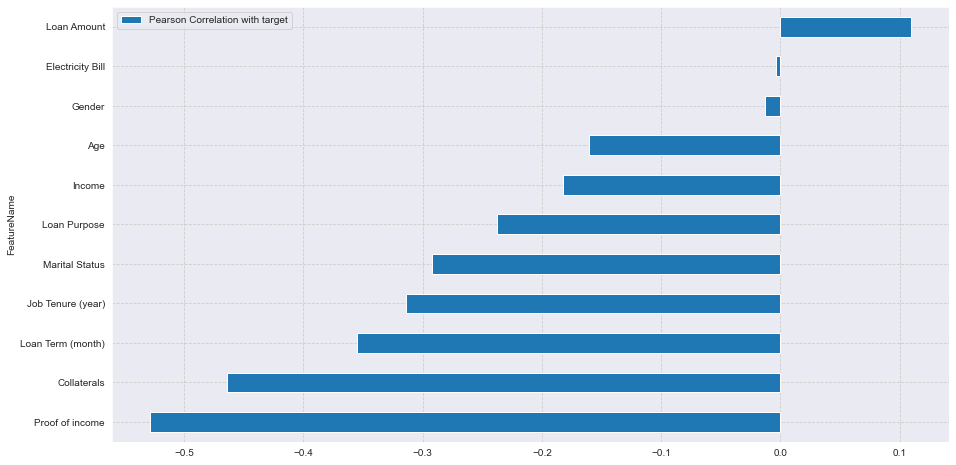

In [42]:
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh")

# Using Logistic Regression to predict

In [120]:
from sklearn.metrics import roc_curve, auc

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [121]:
#import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [122]:
target = ['Ability to repay (0: on-time, 1: overdue)']
features = ['Loan Purpose','Marital Status','Loan Term (month)','Collaterals','Proof of income']

In [123]:
print('Target: ', target)
print('Features: ', features)

Target:  ['Ability to repay (0: on-time, 1: overdue)']
Features:  ['Loan Purpose', 'Marital Status', 'Loan Term (month)', 'Collaterals', 'Proof of income']


In [124]:
X = data1[features].values
y = data1[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.01768386 -1.53812848  1.05898955 -1.00544963  0.817884  ]
 [ 1.45839984  1.10071199 -0.30860742 -1.00544963  0.817884  ]
 [-1.01768386 -1.53812848 -0.36559063  0.99457991  0.817884  ]
 ...
 [ 0.22035799  1.10071199 -0.99240591 -1.00544963 -1.22266727]
 [-0.39866293 -1.53812848  0.37519106  0.99457991  0.817884  ]
 [ 0.22035799  1.10071199 -0.30860742  0.99457991  0.817884  ]]
[[ 1.45839984 -1.53812848 -1.33430515  0.99457991  0.817884  ]
 [-1.01768386  1.10071199  1.74278803  0.99457991  0.817884  ]
 [ 1.45839984 -0.21870825  1.74278803  0.99457991  0.817884  ]
 ...
 [ 0.22035799  1.10071199  0.37519106  0.99457991  0.817884  ]
 [ 0.22035799 -0.21870825  2.42658652  0.99457991  0.817884  ]
 [-1.01768386 -1.53812848 -0.30860742 -1.00544963 -1.22266727]]


In [126]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train.ravel())

y_pred = LR_classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_train, y_pred))

[[625 168]
 [155 524]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       793
           1       0.76      0.77      0.76       679

    accuracy                           0.78      1472
   macro avg       0.78      0.78      0.78      1472
weighted avg       0.78      0.78      0.78      1472

Logistic Regression accuracy:  0.7805706521739131


In [127]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train.ravel())

y_pred = LR_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

[[158  51]
 [ 33 127]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       209
           1       0.71      0.79      0.75       160

    accuracy                           0.77       369
   macro avg       0.77      0.77      0.77       369
weighted avg       0.78      0.77      0.77       369

Logistic Regression accuracy:  0.7723577235772358


In [128]:
import statsmodels.api as SM
model = SM.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.466018
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1472
Model:                          Logit   Df Residuals:                     1467
Method:                           MLE   Df Model:                            4
Date:                Fri, 05 May 2023   Pseudo R-squ.:                  0.3248
Time:                        18:32:35   Log-Likelihood:                -685.98
converged:                       True   LL-Null:                       -1015.9
Covariance Type:            nonrobust   LLR p-value:                1.735e-141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2855      0.080     -3.555      0.000      -0.443      -0.128
x2            -0.8345      0.073    -11.390      0.000      -0.978      -0.691
x3            -0.2282      0.078     -2.914      0.004      -0.382      -0.075
x4            -0.4431      0.086     -5.178      0.000      -0.611      -0.275
x5            -0.8785      0.078    -11.265      0.000      -1.031      -0.726
==============================================================================
"""

In [129]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': data1.loc[:,features].columns, 'Logistic Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

FeatureName  Logistic Regression Feature Importance
4    Proof of income                               -0.857902
1     Marital Status                               -0.836098
3        Collaterals                               -0.452472
0       Loan Purpose                               -0.295500
2  Loan Term (month)                               -0.240259

<AxesSubplot:ylabel='FeatureName'>

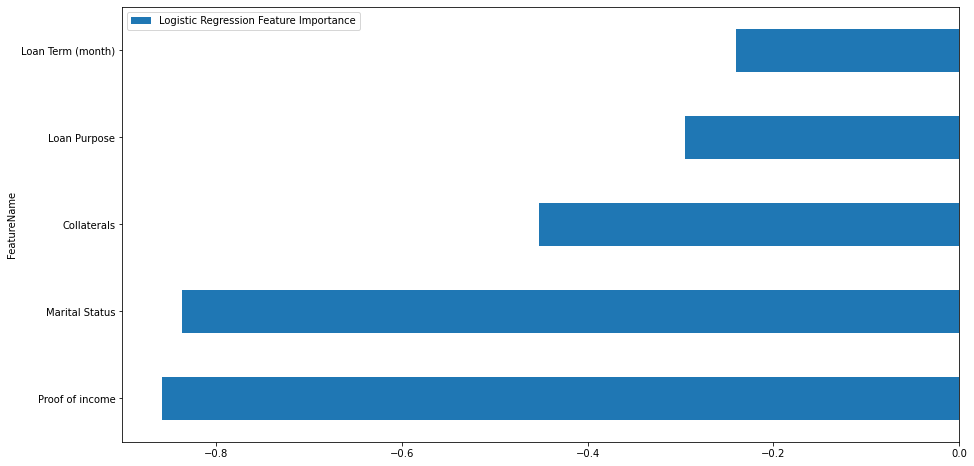

In [130]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


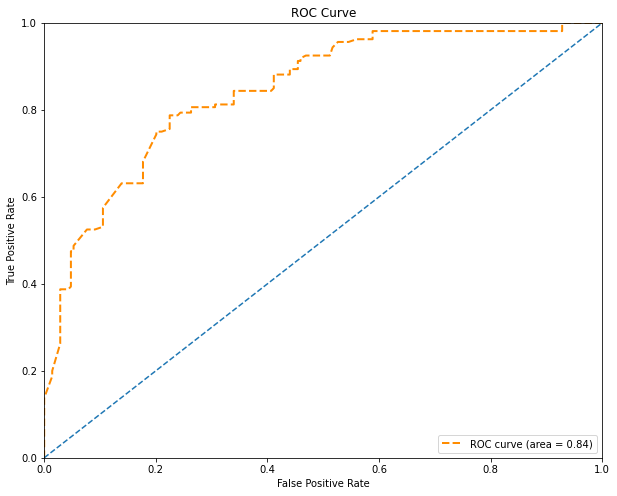

In [131]:
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# Using Decision Tree to predict

In [132]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_train, y_pred))

[[707  86]
 [ 39 640]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       793
           1       0.88      0.94      0.91       679

    accuracy                           0.92      1472
   macro avg       0.91      0.92      0.91      1472
weighted avg       0.92      0.92      0.92      1472

Decision Tree accuracy:  0.9150815217391305


In [133]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

[[179  30]
 [  6 154]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       209
           1       0.84      0.96      0.90       160

    accuracy                           0.90       369
   macro avg       0.90      0.91      0.90       369
weighted avg       0.91      0.90      0.90       369

Decision Tree accuracy:  0.9024390243902439


In [134]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': data1.loc[:,features].columns, 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

FeatureName  Decision Tree Feature Importance
4    Proof of income                          0.337300
0       Loan Purpose                          0.205715
2  Loan Term (month)                          0.205063
1     Marital Status                          0.171653
3        Collaterals                          0.080269

<AxesSubplot:ylabel='FeatureName'>

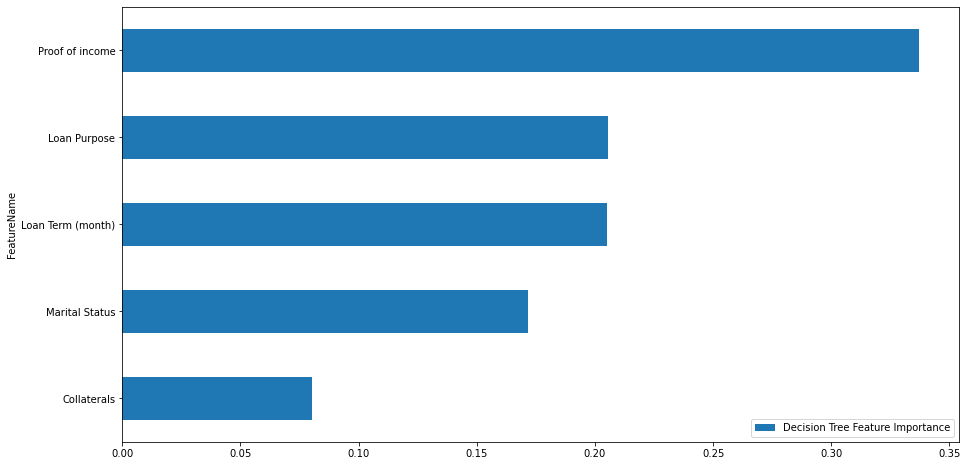

In [135]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


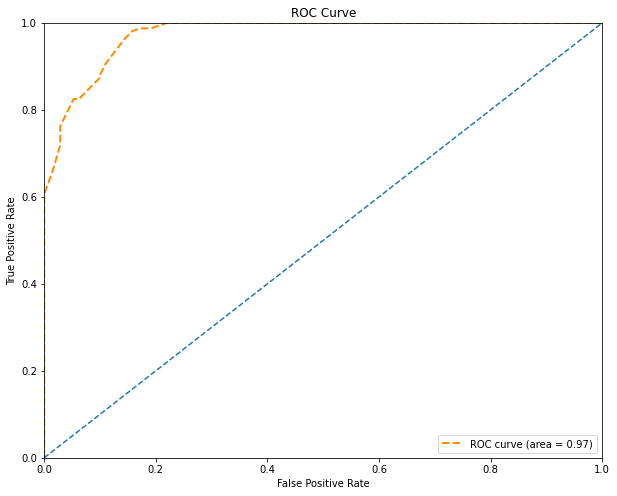

In [136]:
y_pred_prob_test = DT_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [137]:
from sklearn import tree

In [138]:
X_plot_tree = data1[features]

Note:Class 1 is late-payment and class 0 is on-time payment


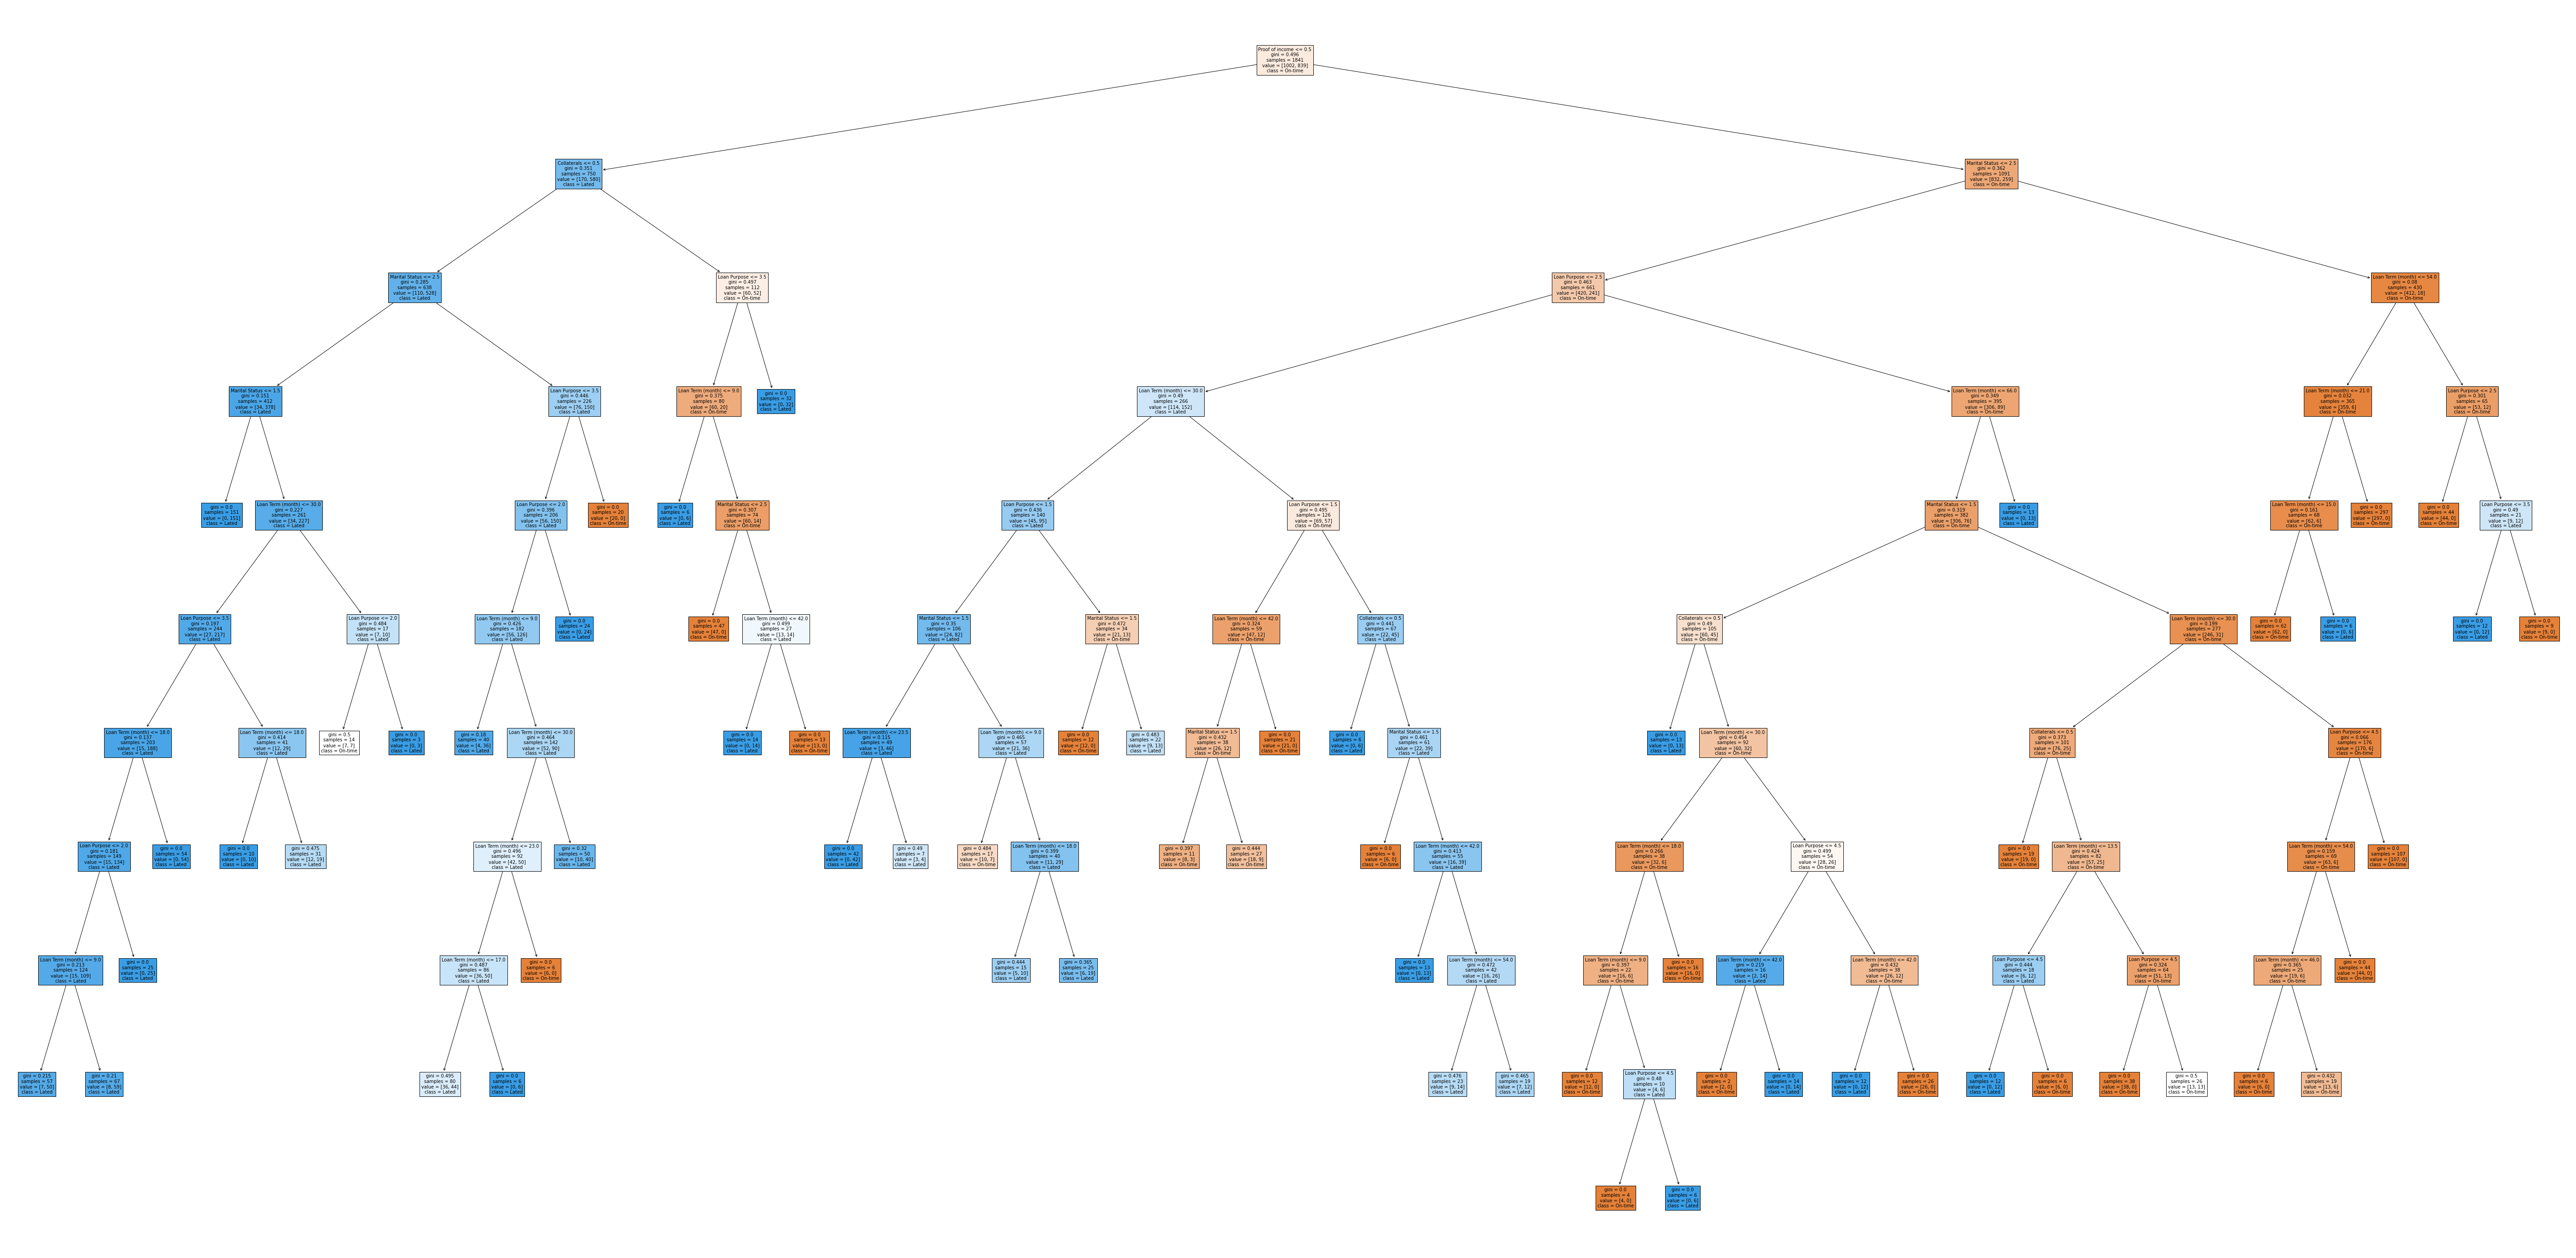

In [139]:
clf = DecisionTreeClassifier()
clf.fit(X_plot_tree.values, y.ravel())
print('Note:Class 1 is late-payment and class 0 is on-time payment')
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(clf,
                 feature_names=features,
                 class_names=['On-time','Lated'],
                 filled=True)

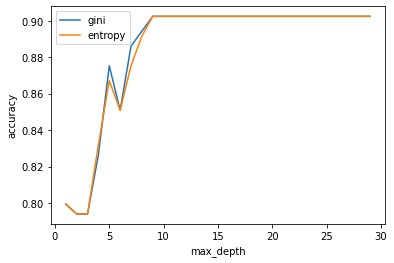

In [140]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [141]:
X_plot_tree = data1[features]

Note:Class 1 is late-payment and class 0 is on-time payment


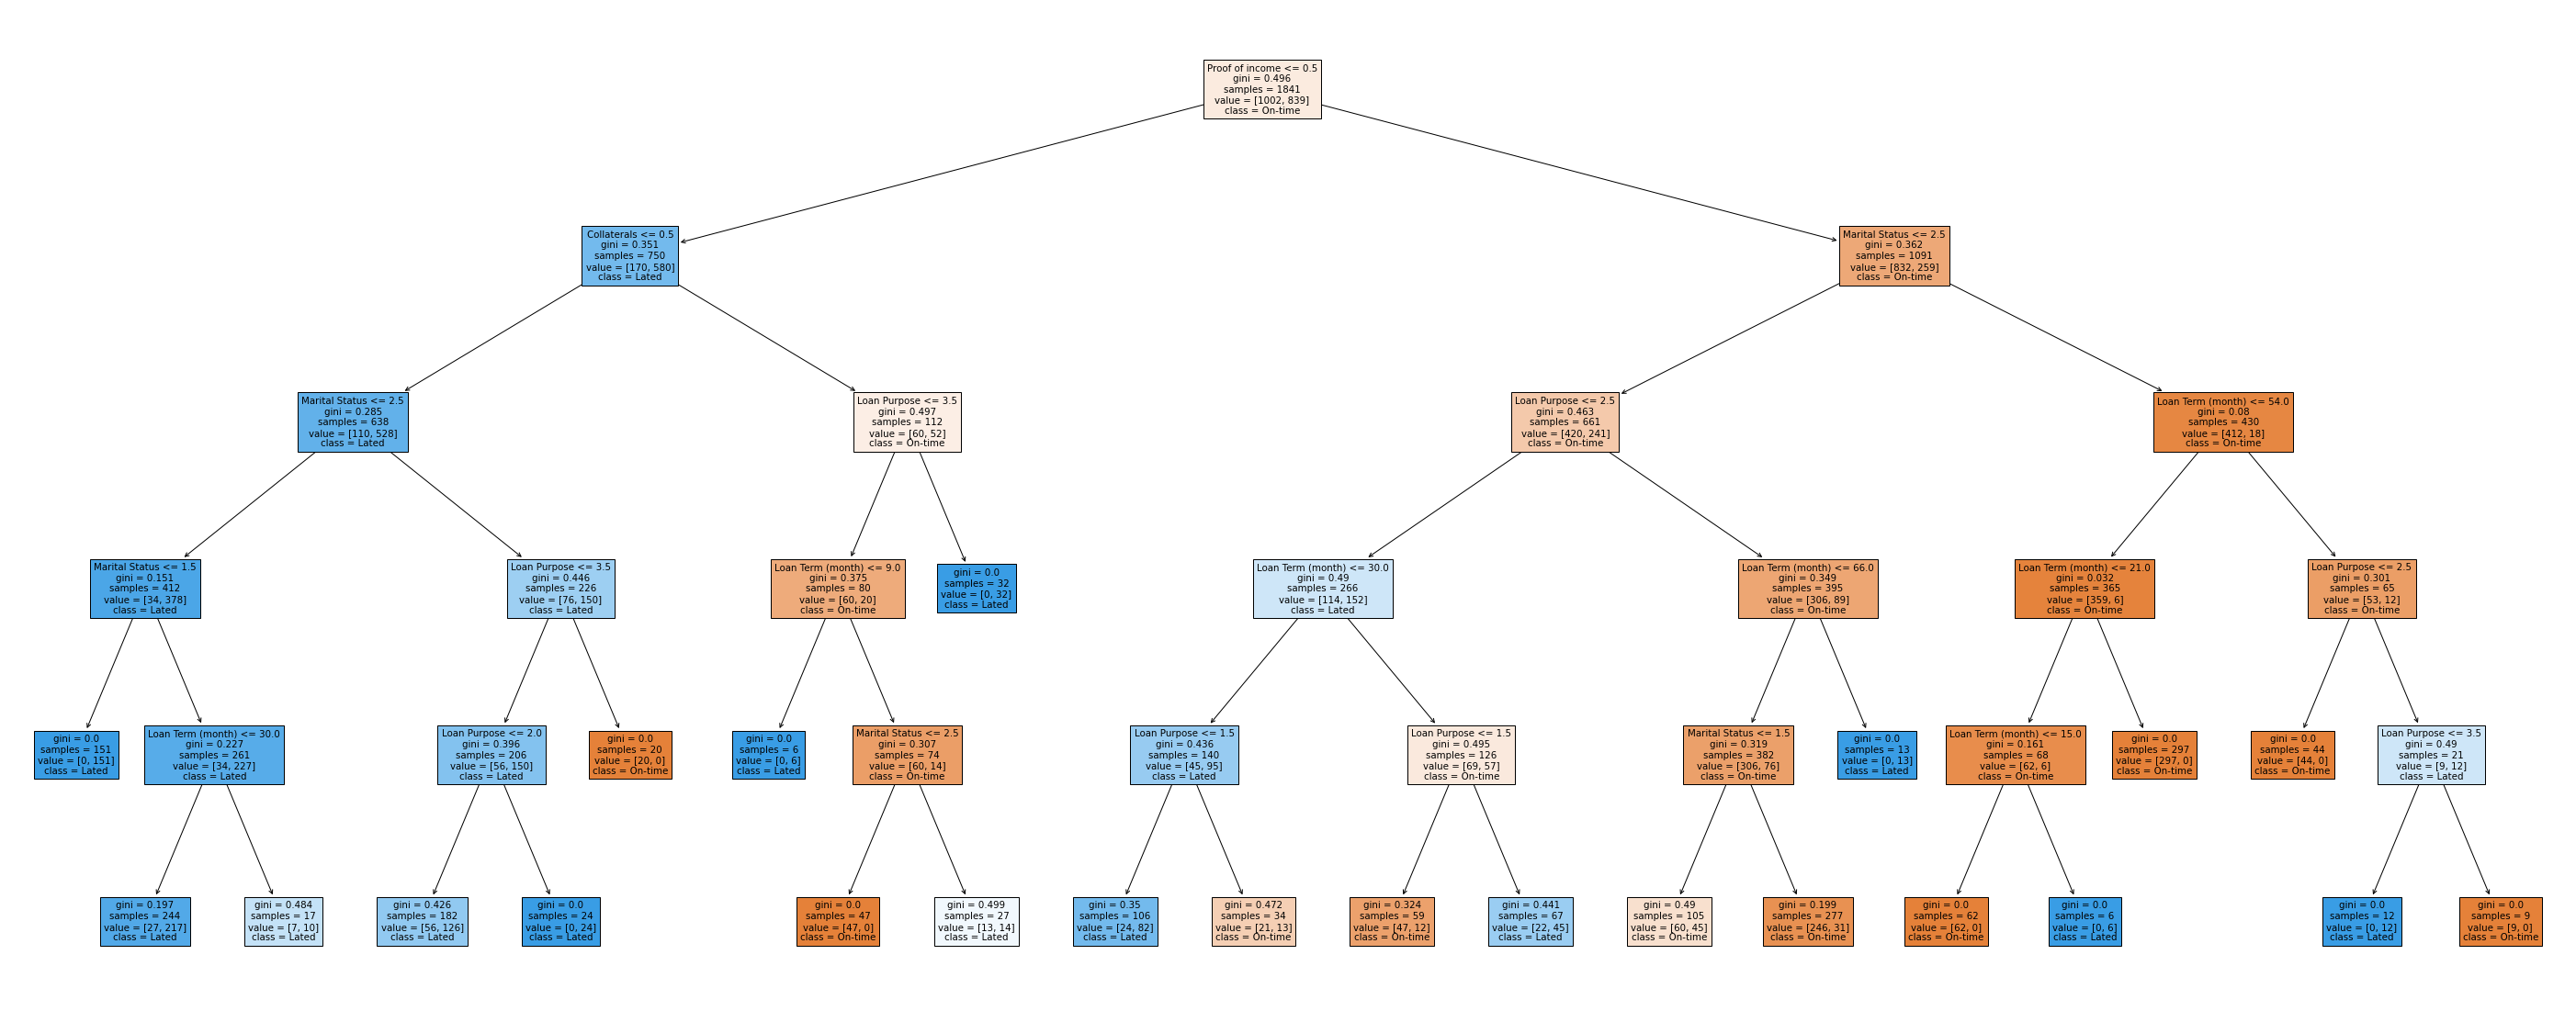

In [142]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf.fit(X_plot_tree.values, y.ravel())
print('Note:Class 1 is late-payment and class 0 is on-time payment')
fig = plt.figure(figsize=(50,20))
_ = tree.plot_tree(clf,
                 feature_names=features,
                 class_names=['On-time','Lated'],
                 filled=True)


# Using Random Forest to predict

In [143]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_train, y_pred))

[[690 103]
 [ 22 657]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       793
           1       0.86      0.97      0.91       679

    accuracy                           0.92      1472
   macro avg       0.92      0.92      0.92      1472
weighted avg       0.92      0.92      0.92      1472

Random Forest accuracy:  0.9150815217391305


In [144]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

[[179  30]
 [  6 154]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       209
           1       0.84      0.96      0.90       160

    accuracy                           0.90       369
   macro avg       0.90      0.91      0.90       369
weighted avg       0.91      0.90      0.90       369

Random Forest accuracy:  0.9024390243902439


In [145]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': data1.loc[:,features].columns, 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

FeatureName  Random Forest Feature Importance
2  Loan Term (month)                          0.263195
4    Proof of income                          0.231173
1     Marital Status                          0.179056
0       Loan Purpose                          0.166754
3        Collaterals                          0.159821

<AxesSubplot:ylabel='FeatureName'>

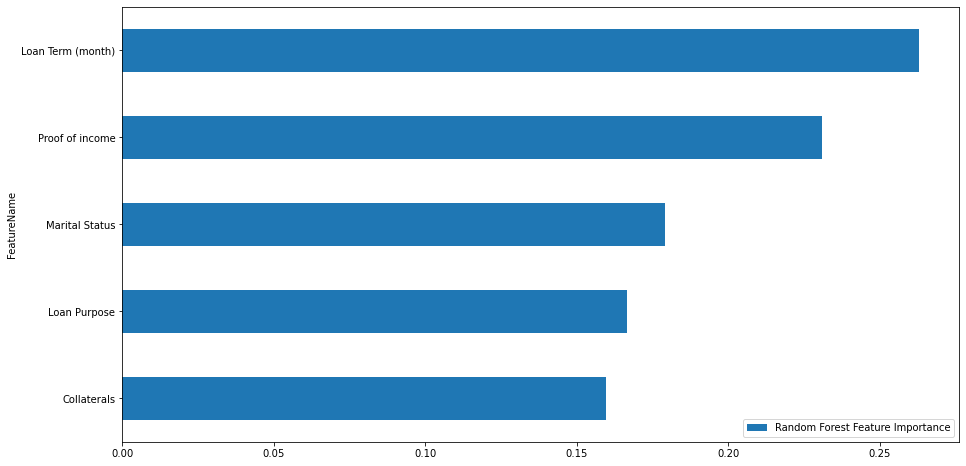

In [146]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


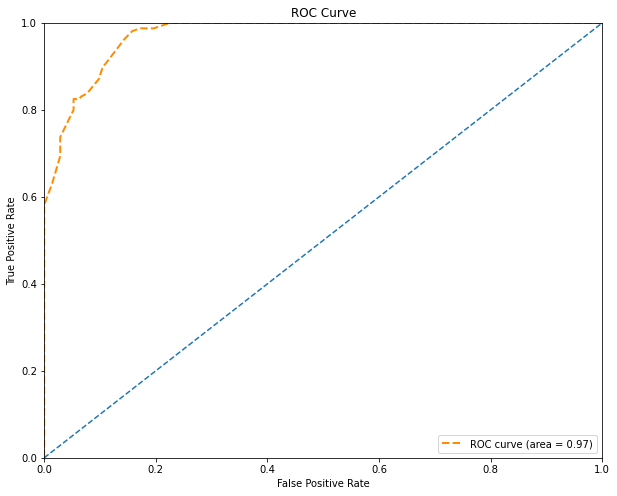

In [147]:
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# Using SVM to predict

In [148]:
from sklearn.svm import SVC

In [149]:
svc_classifier = SVC(kernel = 'linear', random_state = 42)
svc_classifier.fit(X_train, y_train.ravel())
y_pred = svc_classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print('SVC accuracy: ', accuracy_score(y_train, y_pred))

[[660 133]
 [222 457]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       793
           1       0.77      0.67      0.72       679

    accuracy                           0.76      1472
   macro avg       0.76      0.75      0.75      1472
weighted avg       0.76      0.76      0.76      1472

SVC accuracy:  0.7588315217391305


In [150]:
svc_classifier = SVC(kernel = 'linear', random_state = 42, probability=True)
svc_classifier.fit(X_train, y_train.ravel())
y_pred = svc_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('SVC accuracy: ', accuracy_score(y_test, y_pred))

[[172  37]
 [ 37 123]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       209
           1       0.77      0.77      0.77       160

    accuracy                           0.80       369
   macro avg       0.80      0.80      0.80       369
weighted avg       0.80      0.80      0.80       369

SVC accuracy:  0.7994579945799458


C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


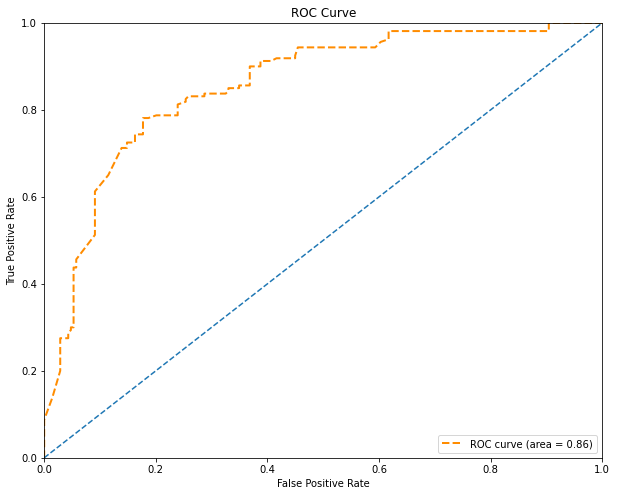

In [151]:
y_pred_prob_test = svc_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# Using Naive Bayes to predict

In [152]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [153]:
y_pred = gnb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print('Naive Bayes accuracy: ', accuracy_score(y_train, y_pred))

[[595 198]
 [152 527]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       793
           1       0.73      0.78      0.75       679

    accuracy                           0.76      1472
   macro avg       0.76      0.76      0.76      1472
weighted avg       0.76      0.76      0.76      1472

Naive Bayes accuracy:  0.7622282608695652


In [154]:
y_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Naive Bayes accuracy: ', accuracy_score(y_test, y_pred))

[[147  62]
 [ 34 126]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       209
           1       0.67      0.79      0.72       160

    accuracy                           0.74       369
   macro avg       0.74      0.75      0.74       369
weighted avg       0.75      0.74      0.74       369

Naive Bayes accuracy:  0.7398373983739838


C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


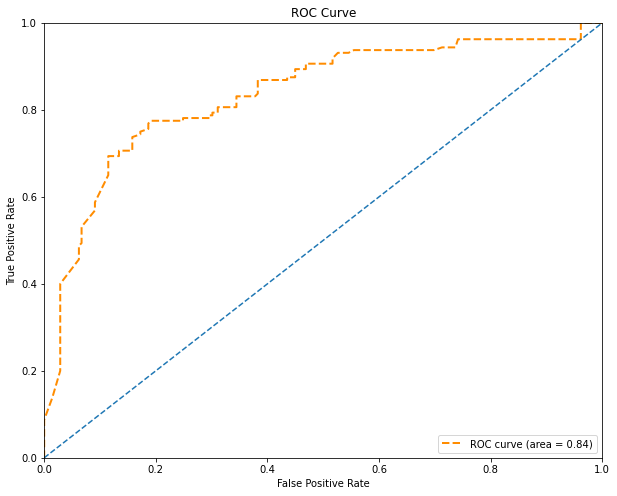

In [155]:
y_pred_prob_test = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# Using KNN to predict

In [156]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:

# Check k-value with accuracy
list_k = []
list_acc = []
for K_value in range (1, int(y_train.shape[0]**0.5)):
    classifier = KNeighborsClassifier(n_neighbors = K_value)
    classifier.fit(X_train, y_train.ravel())
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100
    list_k.append(K_value)
    list_acc.append(acc)
    print('Accuracy is', accuracy_score(y_test, y_pred)*100, '% for k_value:', K_value)

Accuracy is 86.1788617886179 % for k_value: 1
Accuracy is 85.63685636856368 % for k_value: 2
Accuracy is 89.15989159891599 % for k_value: 3
Accuracy is 87.8048780487805 % for k_value: 4
Accuracy is 87.8048780487805 % for k_value: 5
Accuracy is 87.8048780487805 % for k_value: 6
Accuracy is 87.8048780487805 % for k_value: 7
Accuracy is 86.44986449864498 % for k_value: 8
Accuracy is 85.90785907859079 % for k_value: 9
Accuracy is 86.1788617886179 % for k_value: 10
Accuracy is 85.36585365853658 % for k_value: 11
Accuracy is 85.36585365853658 % for k_value: 12
Accuracy is 85.90785907859079 % for k_value: 13
Accuracy is 85.36585365853658 % for k_value: 14
Accuracy is 84.82384823848238 % for k_value: 15
Accuracy is 85.36585365853658 % for k_value: 16
Accuracy is 84.82384823848238 % for k_value: 17
Accuracy is 83.19783197831978 % for k_value: 18
Accuracy is 83.19783197831978 % for k_value: 19
Accuracy is 81.02981029810297 % for k_value: 20
Accuracy is 78.59078590785907 % for k_value: 21
Accurac

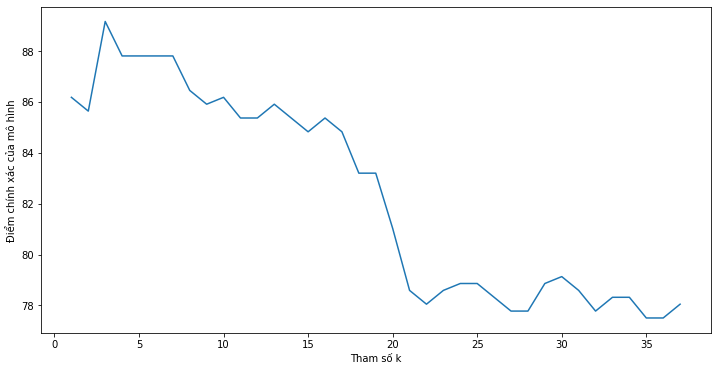

In [158]:
# Visualize k-value with accuracy
plt.figure(figsize = (12, 6))
plt.plot(list_k, list_acc)
plt.xlabel('Tham số k')
plt.ylabel('Điểm chính xác của mô hình')
plt.show()

In [159]:

knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the data
knn.fit(X_train,y_train.ravel())
y_pred = knn.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print('KNN accuracy: ', accuracy_score(y_train, y_pred))

[[737  56]
 [ 85 594]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       793
           1       0.91      0.87      0.89       679

    accuracy                           0.90      1472
   macro avg       0.91      0.90      0.90      1472
weighted avg       0.90      0.90      0.90      1472

KNN accuracy:  0.9042119565217391


In [160]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train.ravel())
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('KNN accuracy: ', accuracy_score(y_test, y_pred))

[[186  23]
 [ 17 143]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       209
           1       0.86      0.89      0.88       160

    accuracy                           0.89       369
   macro avg       0.89      0.89      0.89       369
weighted avg       0.89      0.89      0.89       369

KNN accuracy:  0.8915989159891599


C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


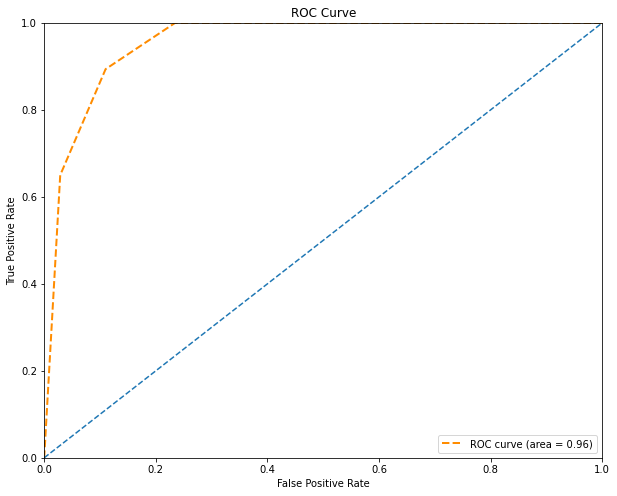

In [161]:
y_pred_prob_test = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# Comparing 3 models

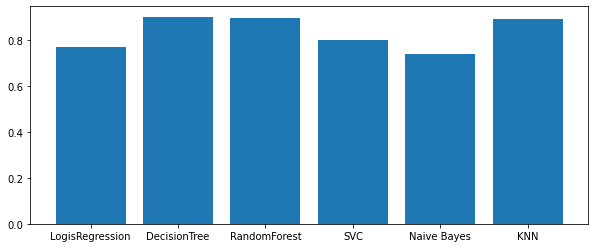

In [162]:
plt.figure(figsize=(10,4))
models = ['LogisRegression', 'DecisionTree', 'RandomForest', 'SVC','Naive Bayes','KNN']
accuracy = [0.7723577235772358, 0.9024390243902439 , 0.8954248366013072, 0.7994579945799458, 0.7398373983739838, 0.8915989159891599]
plt.bar(models, accuracy)
plt.show()

# Improving model quality with upsampling/downsampling

In [163]:
On_time = len(data1[data1['Ability to repay (0: on-time, 1: overdue)'] == 0])
Overdue = len(data1[data1['Ability to repay (0: on-time, 1: overdue)'] == 1])
Percentage_overdue = (Overdue / (Overdue + On_time)) * 100

print("Number of customers repaying on time: ", On_time)
print("Number of customers repaying overdue: ",Overdue)
print("The Percentage of customers repaying overdue: {:.4f}".format(Percentage_overdue))

Number of customers repaying on time:  1002
Number of customers repaying overdue:  839
The Percentage of customers repaying overdue: 45.5731


<AxesSubplot:xlabel='Ability to repay (0: on-time, 1: overdue)', ylabel='count'>

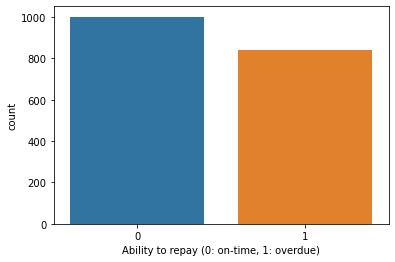

In [164]:
sns.countplot(data = data1, x='Ability to repay (0: on-time, 1: overdue)')

In [165]:
from sklearn.utils import resample

In [166]:
#Upsampling
df_majority = data1[data1['Ability to repay (0: on-time, 1: overdue)']==0]
df_minority = data1[data1['Ability to repay (0: on-time, 1: overdue)']==1]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=1002,random_state = 123)
balanced_dft = pd.concat([df_minority_upsampled,df_majority])
balanced_dft['Ability to repay (0: on-time, 1: overdue)'].value_counts()

1    1002
0    1002
Name: Ability to repay (0: on-time, 1: overdue), dtype: int64

In [167]:
#Undersampling
df_majority = data1[data1['Ability to repay (0: on-time, 1: overdue)']==0] #định nghĩa giá trị 1 là giá trị phổ biến
df_minority = data1[data1['Ability to repay (0: on-time, 1: overdue)']==1] #giá trị 0 là giá trị xuất hiện ít hơn
df_minority_upsampled = resample(df_majority,replace=True,n_samples=839,random_state = 123) #cân bằng lại số lượng giá trị 1 bằng số lượng giá trị 0 là 112 
balanced_df = pd.concat([df_minority_upsampled,df_minority]) #dùng concat để ghép số lượng giá trị 1 mới vào
balanced_df['Ability to repay (0: on-time, 1: overdue)'].value_counts()

0    839
1    839
Name: Ability to repay (0: on-time, 1: overdue), dtype: int64

In [168]:
X_over = balanced_dft[features].values
y_over = balanced_dft[target].values

n_state = 42
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size = 0.2, random_state=n_state)

In [169]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_over_train, y_over_train.ravel())

y_over_pred = DT_classifier.predict(X_over_test)
print(confusion_matrix(y_over_test,y_over_pred))
print(classification_report(y_over_test,y_over_pred))
print('Decision Tree accuracy: ', accuracy_score(y_over_test, y_over_pred))

[[170  28]
 [  4 199]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.91       198
           1       0.88      0.98      0.93       203

    accuracy                           0.92       401
   macro avg       0.93      0.92      0.92       401
weighted avg       0.93      0.92      0.92       401

Decision Tree accuracy:  0.9201995012468828


C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


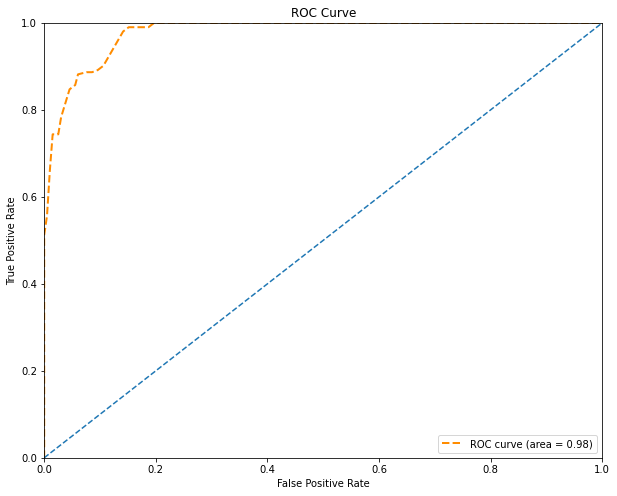

In [170]:
y_over_pred_prob_test = DT_classifier.predict_proba(X_over_test)[:, 1]
fpr, tpr, thres = roc_curve(y_over_test, y_over_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [171]:
X_under = balanced_df[features].values
y_under = balanced_df[target].values

n_state = 42
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size = 0.2, random_state=n_state)

In [172]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_under_train, y_under_train.ravel())

y_under_pred = DT_classifier.predict(X_under_test)
print(confusion_matrix(y_under_test,y_under_pred))
print(classification_report(y_under_test,y_under_pred))
print('Decision Tree accuracy: ', accuracy_score(y_under_test, y_under_pred))

[[141  31]
 [  5 159]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       172
           1       0.84      0.97      0.90       164

    accuracy                           0.89       336
   macro avg       0.90      0.89      0.89       336
weighted avg       0.90      0.89      0.89       336

Decision Tree accuracy:  0.8928571428571429


C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10084/1252486500.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


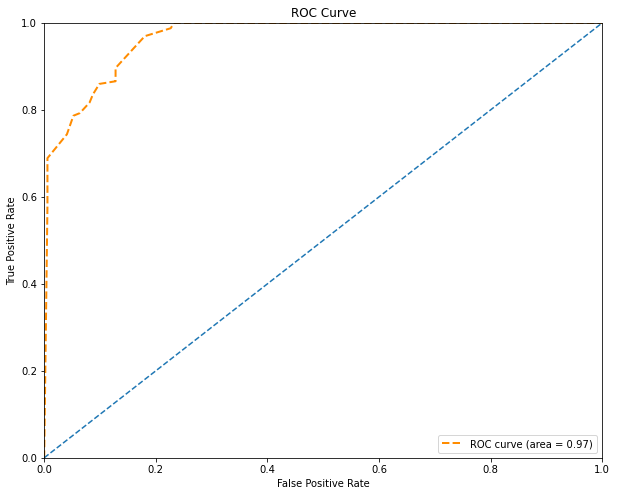

In [173]:
y_under_pred_prob_test = DT_classifier.predict_proba(X_under_test)[:, 1]
fpr, tpr, thres = roc_curve(y_under_test, y_under_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# Predicting new customer

In [203]:
#Dự đoán trên tập data mới
new_data = pd.read_excel("C:\\Users\\ASUS\\Documents\\100 dòng.xlsx")

In [204]:
new_data

ID  Ability to repay (0: on-time, 1: overdue)     Gender  \
0     1                                          1  1. female   
1     2                                          1    0. male   
2     3                                          1  1. female   
3     4                                          0    0. male   
4     5                                          1    0. male   
..  ...                                        ...        ...   
95   96                                          0    0. male   
96   97                                          0  1. female   
97   98                                          0    0. male   
98   99                                          0  1. female   
99  100                                          1    0. male   

         Loan Purpose Marital Status  Electricity Bill  Loan Amount  \
0      1. Consumption      1. Single            295626     55000000   
1     3. Buying a car    2. Divorced            295911    150000000   
2   2. Buying a house      1. Single            295919    100000000   
3       5. Investment     3. Married            295922     27000000   
4       5. Investment      1. Single            296048    450000000   
..                ...            ...               ...          ...   
95      5. Investment    2. Divorced            313619    100000000   
96     1. Consumption    2. Divorced            313795     32000000   
97     1. Consumption     3. Married            313842     48000000   
98     1. Consumption     3. Married            314173     45000000   
99     1. Consumption    2. Divorced            314337     50000000   

    Job Tenure (year)  Age  Loan Term (month)    Income Collaterals  \
0                   4   20                 24  10000000          no   
1                   5   22                 12  20000000          no   
2                   5   41                  6  20000000          no   
3                   5   42                 36  38000000          no   
4                   9   28                 48  20000000          no   
..                ...  ...                ...       ...         ...   
95                  7   38                 60  15000000         yes   
96                  6   51                 36  22000000          no   
97                  6   37                 60  38000000         yes   
98                  5   59                 36  28000000          no   
99                  8   19                 12  20000000          no   

   Proof of income  
0               no  
1               no  
2               no  
3              yes  
4               no  
..             ...  
95             yes  
96              no  
97             yes  
98             yes  
99              no  

[100 rows x 13 columns]

In [205]:
data2=pd.DataFrame(new_data)
data2 =data2.iloc[:,1:]
for i in data2.columns[1:4]:
    data2[i] = data2[i].apply(lambda x: x.split(':')[0]) 
    data2[i] = data2[i].apply(lambda x: x.split('.')[0])
    data2[i] = data2[i].apply(lambda x: int(x))
data2["Collaterals"] = data2["Collaterals"].map({"no": 0, "yes": 1})
data2["Proof of income"] = data2["Proof of income"].map({"no": 0, "yes": 1})
data2 = data2[(data2["Age"] >= 18) & (data2["Age"] <= 60)]
data2= data2.drop(data2.columns[[0,1,4,5,6,7,9]], axis=1)
data2

Loan Purpose  Marital Status  Loan Term (month)  Collaterals  \
0              1               1                 24            0   
1              3               2                 12            0   
2              2               1                  6            0   
3              5               3                 36            0   
4              5               1                 48            0   
..           ...             ...                ...          ...   
95             5               2                 60            1   
96             1               2                 36            0   
97             1               3                 60            1   
98             1               3                 36            0   
99             1               2                 12            0   

    Proof of income  
0                 0  
1                 0  
2                 0  
3                 1  
4                 0  
..              ...  
95                1  
96                0  
97                1  
98                1  
99                0  

[100 rows x 5 columns]

In [206]:
data2 = pd.DataFrame(data2)
data2 = data2.to_numpy()


In [207]:

prediction =DT_classifier.predict(data2)
prediction

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [208]:
new_data['Prediction']=prediction
new_data

ID  Ability to repay (0: on-time, 1: overdue)     Gender  \
0     1                                          1  1. female   
1     2                                          1    0. male   
2     3                                          1  1. female   
3     4                                          0    0. male   
4     5                                          1    0. male   
..  ...                                        ...        ...   
95   96                                          0    0. male   
96   97                                          0  1. female   
97   98                                          0    0. male   
98   99                                          0  1. female   
99  100                                          1    0. male   

         Loan Purpose Marital Status  Electricity Bill  Loan Amount  \
0      1. Consumption      1. Single            295626     55000000   
1     3. Buying a car    2. Divorced            295911    150000000   
2   2. Buying a house      1. Single            295919    100000000   
3       5. Investment     3. Married            295922     27000000   
4       5. Investment      1. Single            296048    450000000   
..                ...            ...               ...          ...   
95      5. Investment    2. Divorced            313619    100000000   
96     1. Consumption    2. Divorced            313795     32000000   
97     1. Consumption     3. Married            313842     48000000   
98     1. Consumption     3. Married            314173     45000000   
99     1. Consumption    2. Divorced            314337     50000000   

    Job Tenure (year)  Age  Loan Term (month)    Income Collaterals  \
0                   4   20                 24  10000000          no   
1                   5   22                 12  20000000          no   
2                   5   41                  6  20000000          no   
3                   5   42                 36  38000000          no   
4                   9   28                 48  20000000          no   
..                ...  ...                ...       ...         ...   
95                  7   38                 60  15000000         yes   
96                  6   51                 36  22000000          no   
97                  6   37                 60  38000000         yes   
98                  5   59                 36  28000000          no   
99                  8   19                 12  20000000          no   

   Proof of income  Prediction  
0               no           1  
1               no           1  
2               no           1  
3              yes           0  
4               no           1  
..             ...         ...  
95             yes           0  
96              no           1  
97             yes           0  
98             yes           0  
99              no           1  

[100 rows x 14 columns]

In [209]:
print(confusion_matrix(new_data['Ability to repay (0: on-time, 1: overdue)'],new_data['Prediction']))
print(classification_report(new_data['Ability to repay (0: on-time, 1: overdue)'],new_data['Prediction']))
print('Accuracy: ', accuracy_score(new_data['Ability to repay (0: on-time, 1: overdue)'],new_data['Prediction']))

[[34 13]
 [ 1 52]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.83        47
           1       0.80      0.98      0.88        53

    accuracy                           0.86       100
   macro avg       0.89      0.85      0.86       100
weighted avg       0.88      0.86      0.86       100

Accuracy:  0.86
